In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from colorama import Fore, Style 
import seaborn as sns

data = pd.read_csv('test.csv')

# Check the balance of the dataset
data.columns = data.columns.str.strip()
print(data['loan_status'].value_counts())

loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


<h3 style="color:yellow;"> EDA

In [2]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
data.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


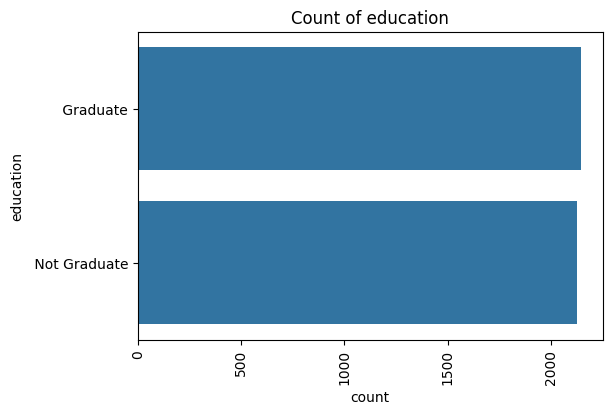

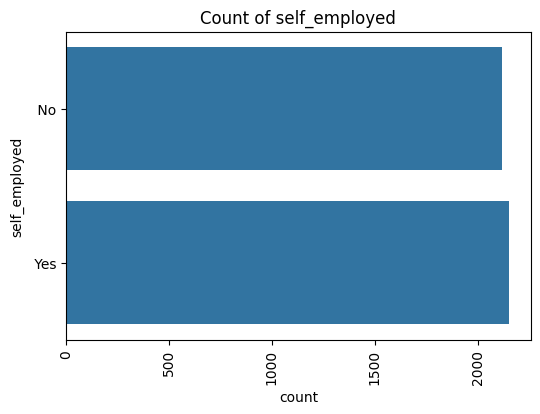

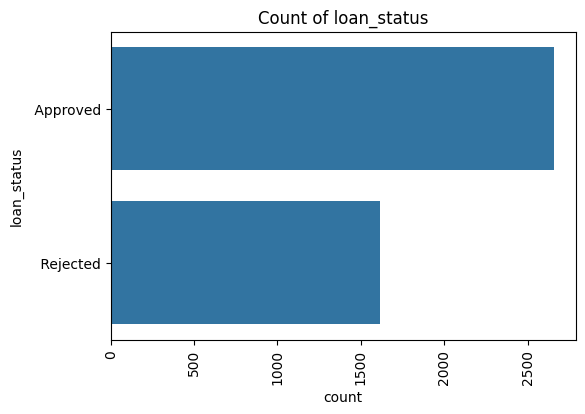

In [5]:
# Plot the count of categorical variables
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data[col])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=90)
    plt.show()

<h3 style="color:yellow;"> data cleaning 

In [6]:
# checking null values
print(Fore.RED + Style.BRIGHT + "checking null values :- "); print(Style.RESET_ALL)
print(data.isnull().sum())

checking null values :- 

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


In [7]:
data.drop('loan_id', axis=1, inplace=True)

# removing spaces from the columns
for col in data.columns:
    if data[col].dtype == 'object':  # If column is of object type (likely strings)
        data[col] = data[col].str.strip()

#@ Fill missing numerical values with mean
numerical_cols = data.select_dtypes(include=[np.number]).columns
data[numerical_cols] = data[numerical_cols].apply(lambda x: x.fillna(x.mean()))

#@ Fill missing categorical values with mode
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# checking null values
print(data.isnull().sum())

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


<h3 style="color:yellow;">Changing strings to numbers</h3>

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Split the dataset
x_train, x_test, y_train, y_test = train_test_split(data.drop('loan_status', axis=1, errors='ignore'), data['loan_status'], test_size=0.2, random_state=42)

# Initialize a dictionary to store the LabelEncoders for each column
label_encoders = {}


le_education = LabelEncoder() # Create a LabelEncoder for the 'education' 
# Fit the encoder to the training data and transform it
x_train['education'] = le_education.fit_transform(x_train['education'])
# doing the same for the testing data
x_test['education'] = le_education.transform(x_test['education'])
# Store the encoder in the dictionary
label_encoders['education'] = le_education

le_self_employed = LabelEncoder()
x_train['self_employed'] = le_self_employed.fit_transform(x_train['self_employed']) 
x_test['self_employed'] = le_self_employed.transform(x_test['self_employed'])
label_encoders['self_employed'] = le_self_employed

le_loan_status = LabelEncoder()
y_train = le_loan_status.fit_transform(y_train)
y_test = le_loan_status.transform(y_test)
label_encoders['loan_status'] = le_loan_status

# Create a StandardScaler for feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
# checking the enconding
print("Loan Status Encoding:", list(le_loan_status.classes_))

# Print the unique values of y_train and y_test
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Loan Status Encoding: ['Approved', 'Rejected']
Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


<h3 style="color:yellow;"> traning the  model

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
logistic_model = LogisticRegression()
support_vector_model = SVC(C = 3)
decision_tree_model = DecisionTreeClassifier()
logistic_model.fit(x_train, y_train)
support_vector_model.fit(x_train, y_train)
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

<p style="color:pink;"> RoC curve </p>

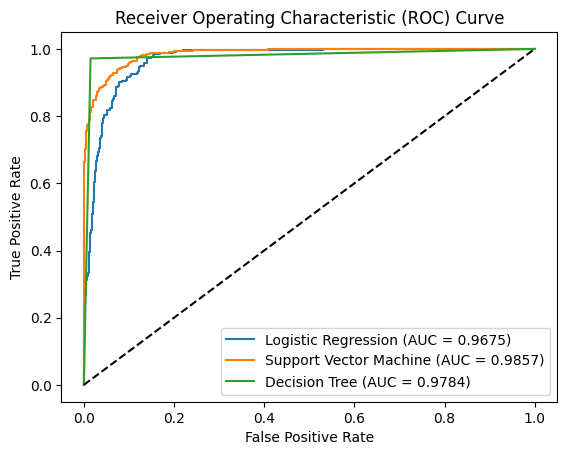

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def calculate_and_plot_roc(model, x_test, y_test, model_name):
    # Calculate the probabilities of the positive class
    if model_name == 'Support Vector Machine':
        y_prob = model.decision_function(x_test)
    else:
        y_prob = model.predict_proba(x_test)[:, 1]

    # Calculate the AUC-ROC
    auc_roc = roc_auc_score(y_test, y_prob)

    # Calculate the ROC curve points
    fpr, tpr, _ = roc_curve(y_test, y_prob)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_roc:.4f})')

    return auc_roc

# Initialize a dictionary to hold the AUC-ROC scores for each model
auc_roc_scores = {}

# Calculate and plot the ROC curve for each model
auc_roc_scores['Logistic Regression'] = calculate_and_plot_roc(logistic_model, x_test, y_test, 'Logistic Regression')
auc_roc_scores['Support Vector Machine'] = calculate_and_plot_roc(support_vector_model, x_test, y_test, 'Support Vector Machine')
auc_roc_scores['Decision Tree'] = calculate_and_plot_roc(decision_tree_model, x_test, y_test, 'Decision Tree')

# Add the diagonal line to the plot
plt.plot([0, 1], [0, 1], 'k--') #black dashed line (used for reference)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

comparing the accuracy of the models

In [12]:
best_model_name = max(auc_roc_scores, key=auc_roc_scores.get) #will return the key with the highest value

# creating a dictionary of models
models = {'Logistic Regression': logistic_model, 'Support Vector Machine': support_vector_model, 'Decision Tree': decision_tree_model}

best_model = models[best_model_name] #it will get the model which has same as the best_model_name

print(Fore.GREEN + Style.BRIGHT + f"{best_model_name} has the highest accuracy")

Support Vector Machine has the highest accuracy


<h3 style="color:yellow;"> taking input from the user </h3>

In [15]:
def predict_loan_status():
    # Take user input
    no_of_dependents = input("Enter number of dependents: ")
    education = input("Enter education level (Graduate/Not Graduate): ")
    self_employed = input("Enter self-employed status (Yes/No): ")
    income_annum = input("Enter annual income: ")
    loan_amount = input("Enter loan amount: ")
    loan_term = input("Enter loan term (years): ")
    cibil_score = input("Enter CIBIL score: ")
    residential_assets_value = input("Enter residential assets value: ")
    commercial_assets_value = input("Enter commercial assets value: ")
    luxury_assets_value = input("Enter luxury assets value: ")
    bank_asset_value = input("Enter bank asset value: ")

    # Convert the input into a DataFrame
    data = pd.DataFrame({
        'no_of_dependents': [no_of_dependents], 
        'education': [education], 
        'self_employed': [self_employed],
        'income_annum': [income_annum],
        'loan_amount': [loan_amount],
        'loan_term': [loan_term],
        'cibil_score': [cibil_score],
        'residential_assets_value': [residential_assets_value],
        'commercial_assets_value': [commercial_assets_value],
        'luxury_assets_value': [luxury_assets_value],
        'bank_asset_value': [bank_asset_value]
    })

    # Apply Label Encoding
    for col in categorical_cols:
        if col != 'loan_status':  # Exclude the target variable
            data[col] = label_encoders[col].transform(data[col])

    # Apply Feature Scaling
    data = scaler.transform(data)

    # Make a prediction
    prediction = best_model.predict(data)

    # Convert the prediction back to its original form ('Approved' or 'Rejected')
    prediction = label_encoders['loan_status'].inverse_transform(prediction)

    return prediction[0]

print("Loan status:", predict_loan_status())

In [14]:
def predict_loan_status():
    # Hardcoded values from the second row of your data
    no_of_dependents = '2'
    education = 'Graduate'
    self_employed = 'Yes'
    income_annum = '40000'
    loan_amount = '12200000'
    loan_term = '100'
    cibil_score = '417'
    residential_assets_value = '2700000'
    commercial_assets_value = '2200000'
    luxury_assets_value = '8800000'
    bank_asset_value = '3300000'

    # Convert the input into a DataFrame
    data = pd.DataFrame({
        'no_of_dependents': [no_of_dependents], 
        'education': [education], 
        'self_employed': [self_employed],
        'income_annum': [income_annum],
        'loan_amount': [loan_amount],
        'loan_term': [loan_term],
        'cibil_score': [cibil_score],
        'residential_assets_value': [residential_assets_value],
        'commercial_assets_value': [commercial_assets_value],
        'luxury_assets_value': [luxury_assets_value],
        'bank_asset_value': [bank_asset_value]
    })

    # Apply Label Encoding
    for col in categorical_cols:
        if col != 'loan_status':  # encoding till it's not loan_status
            try:
                data[col] = label_encoders[col].transform(data[col])
            except ValueError:
                data[col] = label_encoders[col].transform(['Unknown'])

    # Apply Feature Scaling
    data = scaler.transform(data)

    prediction = best_model.predict(data)

    # Convert the prediction back to its original form ('Approved' or 'Rejected')
    prediction = label_encoders['loan_status'].inverse_transform(prediction)

    return prediction[0]

print("Loan status:", predict_loan_status())

Loan status: Approved
